## Part 1

#### 1.A relevant paper is L.N. Trefethen and R.S. Schreiber. Average-case stability of Gauss-ian elimination. Please read this paper in sufficient detail to understand the main points.

I have read the paper in sufficient detail and I have understood the main points.

#### 2.Write a function that takes n as its parameter and generates an nxn matrix, whose entries are random numbers with a normal distribution. 

In [1]:
import numpy as np
def get_normal_matrix(n, mean=0.0, var=1.0):
    return np.random.normal(mean, var, (n, n))

#### 3.Implement Gaussian elimination with partial pivoting, and test it on a number of cases to be sure of its correctness.

In [2]:
def gau_pp(A, b, solver=False):
    n = A.shape[0]
    max0 = np.max(abs(A))
    maxk = max0
    for k in range(n):
        max_index = abs(A[k:, k]).argmax() + k
        if A[max_index,k]==0:
            raise ValueError("Singular matrix")
        if max_index != k:
            #change rows
            A[[k,max_index]] = A[[max_index, k]]
            b[[k,max_index]] = b[[max_index, k]]
        for r in range(k+1, n):
            mul = A[r, k]/A[k, k]
            A[r, k:] = A[r, k:] - mul * A[k, k:]
            b[r] = b[r] - mul * b[k]
        maxk = max(maxk, np.max(abs(A)))
    g = maxk/max0
    x = None
    if solver:
        x = np.zeros(n)
        for k in range(n-1, -1, -1):
            x[k] = (b[k] - np.dot(A[k, k + 1:], x[k + 1:])) / A[k, k]
    return A, b, x, g

In [3]:
from numpy.linalg import inv
NUM_TEST = 5
n = 5
for i in range(NUM_TEST):
    A = get_normal_matrix(n, mean=0.0, var=1.0)
    b = np.random.normal(0, 1, n)
    ainv = inv(A)
    x_true = np.dot(ainv, b)
    _, _, x_gpp, _ = gau_pp(A, b, solver=True)
    print("for iter {} true {} gpp {}".format(i, x_true, x_gpp))    

for iter 0 true [ 1.00994589  1.37078055 -1.11124161  0.53430024  1.02058832] gpp [ 1.00994589  1.37078055 -1.11124161  0.53430024  1.02058832]
for iter 1 true [-1.2555494   0.64925741 -0.11807838 -0.78097897 -0.41776669] gpp [-1.2555494   0.64925741 -0.11807838 -0.78097897 -0.41776669]
for iter 2 true [ 1.0296812   1.41157669  1.39995177 -0.23734711  0.49094772] gpp [ 1.0296812   1.41157669  1.39995177 -0.23734711  0.49094772]
for iter 3 true [-0.62520569  0.63911794  0.2085015  -0.32601037  1.04011023] gpp [-0.62520569  0.63911794  0.2085015  -0.32601037  1.04011023]
for iter 4 true [11.56437316 18.00739065 -3.833588   -1.20792671  4.05697045] gpp [11.56437316 18.00739065 -3.833588   -1.20792671  4.05697045]


#### 4.Plot the growth factor against the matrix size

Compute growth factor for matrixs.

In [11]:
import time
Per_n = 100
n = [i*10 for i in range(1, 101)]
g = np.zeros(len(n))

start = time.time()
for i in range(len(n)):
    tmp_l = []
    n_value = n[i]
    print('current n is {}'.format(n_value))
    for j in range(Per_n):
        A = get_normal_matrix(n_value)
        b = np.random.normal(0, 1, n_value)
        _, _, _, tmp = gau_pp(A, b, solver=False)
        tmp_l.append(tmp)
    g[i] = np.mean(tmp_l)
end = time.time()

np.save('g.npy', g) 

current n is 10
current n is 20
current n is 30
current n is 40
current n is 50
current n is 60
current n is 70
current n is 80
current n is 90
current n is 100
current n is 110
current n is 120
current n is 130
current n is 140
current n is 150
current n is 160
current n is 170
current n is 180
current n is 190
current n is 200
current n is 210
current n is 220
current n is 230
current n is 240
current n is 250
current n is 260
current n is 270
current n is 280
current n is 290
current n is 300
current n is 310
current n is 320
current n is 330
current n is 340
current n is 350
current n is 360
current n is 370
current n is 380
current n is 390
current n is 400
current n is 410
current n is 420
current n is 430
current n is 440
current n is 450
current n is 460
current n is 470
current n is 480
current n is 490
current n is 500
current n is 510
current n is 520
current n is 530
current n is 540
current n is 550
current n is 560
current n is 570
current n is 580
current n is 590
curren

Plot the growth factor against the matrix size and calcute the coefficients

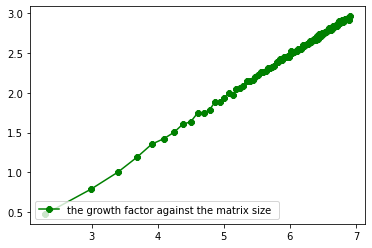

g = 0.4518180823072029n^0.5440941677567507


In [14]:
import math
import matplotlib.pyplot as plt

log_g = np.log(g)
log_n = np.log(n)

plt.plot(log_n, log_g, color='green', marker='8')
plt.legend(['the growth factor against the matrix size '], loc='lower left')
plt.show()

coeffs = np.polyfit(log_n, log_g, 1)
alpha = coeffs[0]
c = math.exp(coeffs[1])
print('g = {}n^{}'.format(c, alpha))

Here we can estimate alpha as 0.544 and c as 0.45, and it is much more smaller than 2^n

#### 5. study the probability distribution of the growth factor for a fixed n.

In [18]:
import time
n_l = [10, 20, 40, 80]
g_l = [[], [], [], []]
NUM = 10000
start = time.time()
for i in range(len(n_l)):
    n = n_l[i]
    b = np.random.normal(0, 1, n)
    for j in range(NUM):
        A = get_normal_matrix(n, mean=0.0, var=1.0)
        _, _, _, tmp = gau_pp(A, b, solver=False)
        g_l[i].append(tmp)      
end = time.time()
np.save('g_n.npy', g_l)

<ipython-input-2-abe49f348e5c>:16: RuntimeWarning: overflow encountered in double_scalars
  b[r] = b[r] - mul * b[k]
<ipython-input-2-abe49f348e5c>:16: RuntimeWarning: invalid value encountered in double_scalars
  b[r] = b[r] - mul * b[k]


Plot the approximation of the probability density function of the growth factor.

In [34]:
def get_bar_x(x):
    L = len(x)
    bar_x = np.zeros(L-1)
    for i in range(L-1):
        bar_x[i] = (x[i]+x[i+1])/2
    return bar_x        

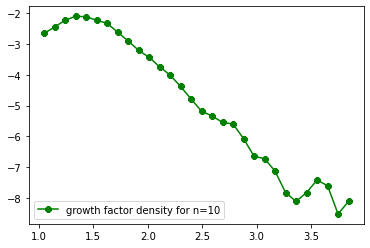

In [36]:
y, x = np.histogram(g_l[0], bins=30)
x = get_bar_x(x)
y= np.log(y/np.sum(y))

plt.plot(x, y, color='green', marker='8')
plt.legend(['growth factor density for n=10'], loc='lower left')
plt.show()

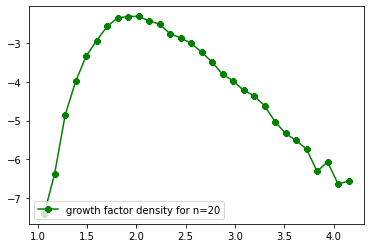

In [42]:
y, x = np.histogram(g_l[1], bins=50)
y = y[0:30]
x = get_bar_x(x[0:31])
y= np.log(y/np.sum(y))

plt.plot(x, y, color='green', marker='8')
plt.legend(['growth factor density for n=20'], loc='lower left')
plt.show()

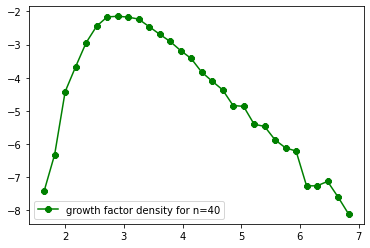

In [46]:
y, x = np.histogram(g_l[2], bins=50)
y = y[0:30]
x = get_bar_x(x[0:31])
y= np.log(y/np.sum(y))

plt.plot(x, y, color='green', marker='8')
plt.legend(['growth factor density for n=40'], loc='lower left')
plt.show()

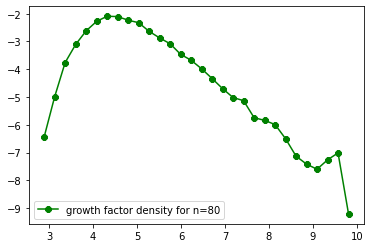

In [49]:
y, x = np.histogram(g_l[3], bins=50)
y = y[0:30]
x = get_bar_x(x[0:31])
y= np.log(y/np.sum(y))

plt.plot(x, y, color='green', marker='8')
plt.legend(['growth factor density for n=80'], loc='lower left')
plt.show()

We can see that the tail decays exponentially.We can see that the probability density decays as the growth factor becomes large.